# Анализ рынка заведений общественного питания в Москве


## Цель исследования:
1. Исследовать соотношение сетевых и несетевых видов объектов общественного питания по количеству
2. Определить для какого вида объекта общественного питания характерно сетевое распространение
3. Определить среднее количество посадочных мест для каждого вида объекта общественного питания
4. Выявить топ-10 улиц по количеству объектов общественного питания — в каких районах Москвы находятся данные улицы
5. Сформулировать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения нового объекта общественного питания

## Информация о входных данных

* __object_name__ — *название объекта общественного питания*
* __chain__ — *сетевой ресторан*
* __object_type__ — *тип объекта общественного питания*
* __address__ — *адрес объекта*
* __number__ — *количество посадочных мест*


## Содержание

* [Шаг 1. Изучение входных данных](#num1)
    * [1.1. Анализ аномальных значений количества посадочных мест](#num11)


* [Шаг 2. Анализ данных](#num2)
    * [2.1. Исследование соотношения видов объектов общественного питания по количеству](#num21)
    * [2.2. Исследование соотношения сетевых и несетевых заведений по количеству](#num22)
    * [2.3. Определение для какого вида объекта общественного питания характерно сетевое распространение](#num23)
    * [2.4. Исследование особенностей сетевых заведений](#num24)
    * [2.5. Расчет среднего количества посадочных мест для каждого вида объекта общественного питания](#num25)
    * [2.6. Определение улицы на которой расположен объект](#num26)
    * [2.7. Список "топ-10 улиц по количеству объектов общественного питания"](#num27)
    * [2.8. Определение в районов Москвы для "топ-10 улиц"](#num28)
    * [2.9. Определение улиц и районов с одним объектом общественного питания](#num29)
    * [2.10. Изучение количества посадочных мест для улиц с большим количеством объектов общественного питания](#num210)
    
    
* [Выводы](#num3)


* [Рекомендации](#num4)

<a id="num1"></a>
## Шаг 1. Изучение входных данных
Импортируем все необходимые библиотеки 

In [1]:
import pandas as pd              
import matplotlib.pyplot as plt  
import numpy as np               
import seaborn as sns                       
import requests                  
import re                        
from bs4 import BeautifulSoup    
from io import BytesIO           

sns.set_palette('pastel') 
sns.set_style('white')

In [2]:
cafe_data = pd.read_csv('/datasets/rest_data.csv')

### Изучение таблицы 

In [3]:
cafe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
cafe_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
cafe_data['object_name'] = cafe_data['object_name'].str.lower()

In [6]:
cafe_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [7]:
cafe_data.duplicated().sum()

0

Посмотрим найдутся ли дубликаты, если исключим столбец id:

In [8]:
cafe_data.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'], keep=False).value_counts()

False    15216
True       150
dtype: int64

#### Итого:
- Пропущенных значений **нет**
- Нашли 150 дубликатов в датасете без столбца 'id'. Не уверена, что их стоит удалять, поскольку, например, по одному адресу может находится два одинаковых объекта (как пример -- две Шоколадница в Европейском).
- Все столбцы имеют **корректный** тип данных

<a id="num11"></a>
### 1.1. Анализ аномальных значений количества посадочных мест
Для анализа аномальных значений данного показателя построим диаграмму размаха для каждого вида объекта общественного питания и  изучим различия в распределении количества посадочных мест для каждого вида объекта.

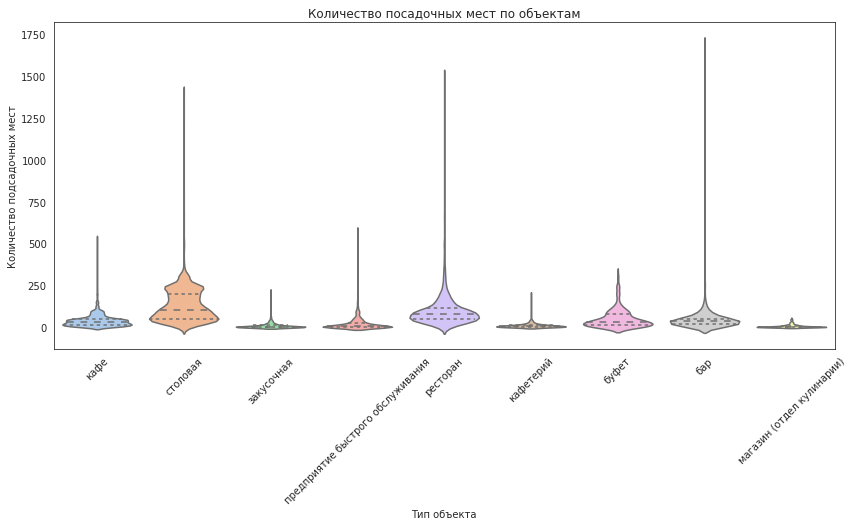

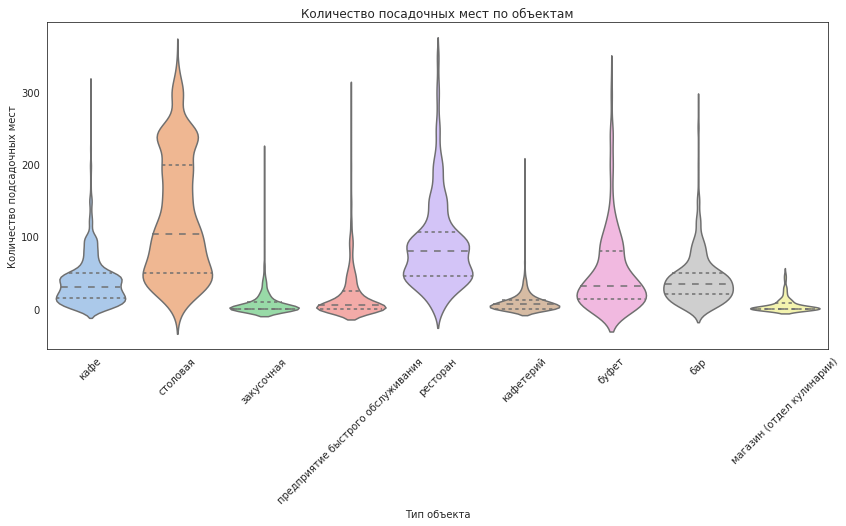

In [9]:
# строим график дляколичества посадочных мест
plt.figure(figsize=(14, 6)) 
plt.title('Количество посадочных мест по объектам')
sns.violinplot(y='number', x='object_type', data=cafe_data, scale='width',
               inner='quartile').set(xlabel='Тип объекта', ylabel='Количество подсадочных мест')
plt.xticks(rotation= 45)
plt.show()

filter_seat = 350 

# строим график с применением фильтра количества посадочных мест
plt.figure(figsize=(14, 6)) # Размер графика
plt.title('Количество посадочных мест по объектам')
sns.violinplot(y='number', x='object_type', data=cafe_data.query('number <= @filter_seat'), scale='width', inner='quartile').set(xlabel='Тип объекта', ylabel='Количество подсадочных мест')
plt.xticks(rotation= 45)
plt.show()

Таким образом можно отметить, что количество посадочных мест для каждого вида объекта питания отличается друг от друга. Так например, для  __столовых__ медианое значение количества посадочных мест составляет ~110 мест, а аномальные значения начинаются примерно за пределами 340. Для __закусочных, кафетериев и магазинов кулинарии__ наличие посадочных мест вовсе не обязательно и в этих категориях выбросы начинаются уже после 40 посадочных мест. Таким образом чтобы правильно отсечь аномально высокие значения количества посадочных мест, необходимо определить границу допустимых значений для каждого отдельно взятого вида объекта общественного питания и отсекать все значения, которые превышают данную границу.

In [10]:
# цикл для вычисления верхней границы отсечения аномальных значений
object_type_list = cafe_data['object_type'].unique() 
filter_list = []
cafe_data_len = len(cafe_data)
for x in object_type_list:
    filter_seat = cafe_data.query('object_type == @x')['number'].quantile(0.99) #  99 квантиль
    filter_list.append(filter_seat)

# фильтруем df по верхней границе аномального значения для каждого вида 
clear_data1 = cafe_data.query('object_type == @object_type_list[0] and number < @filter_list[0]')
clear_data2 = cafe_data.query('object_type == @object_type_list[1] and number < @filter_list[1]')
clear_data3 = cafe_data.query('object_type == @object_type_list[2] and number < @filter_list[2]')
clear_data4 = cafe_data.query('object_type == @object_type_list[3] and number < @filter_list[3]')
clear_data5 = cafe_data.query('object_type == @object_type_list[4] and number < @filter_list[4]')
clear_data6 = cafe_data.query('object_type == @object_type_list[5] and number < @filter_list[5]')
clear_data7 = cafe_data.query('object_type == @object_type_list[6] and number < @filter_list[6]')
clear_data8 = cafe_data.query('object_type == @object_type_list[7] and number < @filter_list[7]')
clear_data9 = cafe_data.query('object_type == @object_type_list[8] and number < @filter_list[8]')

In [11]:
# объединяем очищенные df в один общий 
cafe_data = pd.concat([clear_data1, clear_data2, clear_data3, clear_data4, 
                       clear_data5, clear_data6, clear_data7, clear_data8, clear_data9], ignore_index=True)
print('Количество строк до удаления аномальных значений:', cafe_data_len)
print('Количество строк после удаления аномальных значений:', len(cafe_data))

Количество строк до удаления аномальных значений: 15366
Количество строк после удаления аномальных значений: 15197


### Вывод
В ходе предобработки данных было выявлено и удалено __169__ аномальных значений количества посадочных мест, что составило около__1%__ от общего объёма данных. Теперь данные пригодны для проведения исследовательского анализа.

<a id="num2"></a>
## Шаг 2. Анализ данных

<a id="num21"></a>
### 2.1. Исследование соотношения видов объектов общественного питания по количеству

In [12]:
## гркппировка по типу объекта и общее количество объектов для каждого типа
type_list = cafe_data.groupby(by='object_type').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()

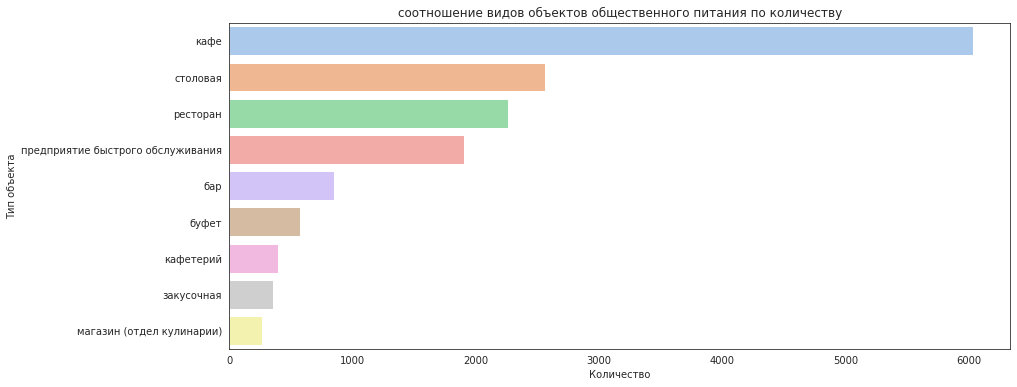

In [13]:
# график распределения объектов общественного питания по типам объекта
plt.figure(figsize=(14, 6)) 
plt.title('соотношение видов объектов общественного питания по количеству') 
sns.barplot(x='id', y='object_type', data=type_list).set(ylabel='Тип объекта', xlabel='Количество')
plt.show()

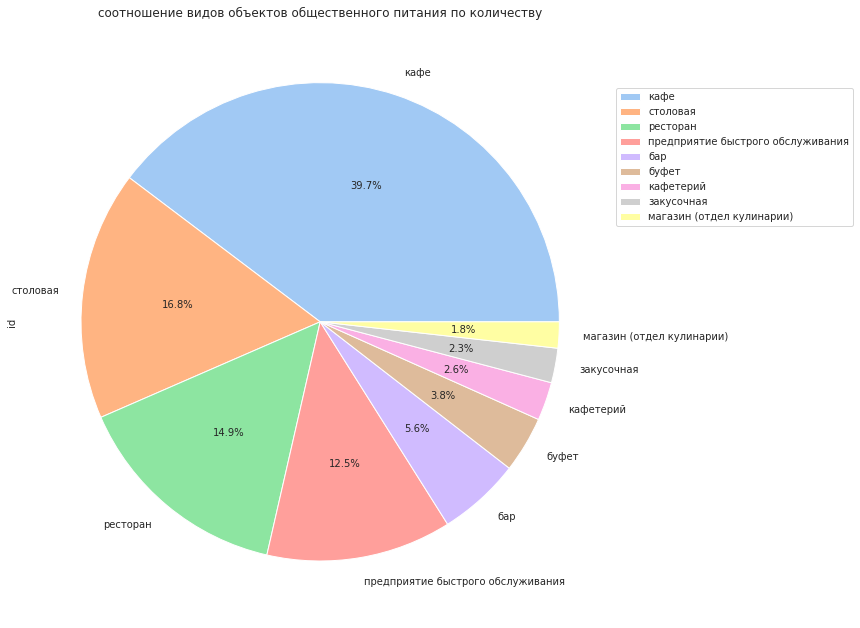

In [14]:
# круговая диаграмма
cafe_data.groupby(by='object_type').agg({'id':'count'}).sort_values(by='id', ascending=False).plot(y="id", 
                                                                                                   kind="pie", 
                                                                                                   figsize=(11, 11), 
                                                                                                   autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(0.7, 0, 0.7, 0.9)) 
plt.title('соотношение видов объектов общественного питания по количеству') 
plt.show()

In [15]:
type_list.columns = ['Тип объекта', 'Количество']
display(type_list) 

,Тип объекта,Количество
0,кафе,6034
1,столовая,2558
2,ресторан,2262
3,предприятие быстрого обслуживания,1903
4,бар,847
5,буфет,576
6,кафетерий,394
7,закусочная,355
8,магазин (отдел кулинарии),268


### Вывод
Наибольшую долю рынка общественного питания в городе Москва занимают __кафе__ - (40%), далее идут __столовые__ (16.8%), __рестораны__ (14.9%) и __предприятия быстрого обслуживания__ (12.5%). На остальные виды объектов общественного питания приходится в сумме 16.8%. 

<a id="num22"></a>
### 2.2. Исследование соотношения сетевых и несетевых заведений по количеству
На графиках, приведённых ниже, наглядно видно какую долю занимают сетевые и несетевые объекты общественного питания.

In [16]:
# группировка 
chain_list = cafe_data.groupby('chain').agg({'id':'count'}).reset_index()

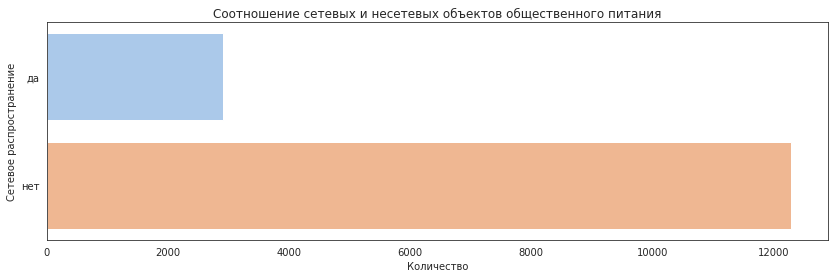

In [17]:
# гистограмма соотношения сетевых и несетевых объектов питания
plt.figure(figsize=(14, 4))
plt.title('Соотношение сетевых и несетевых объектов общественного питания') 
sns.barplot(x='id', y='chain', data=chain_list).set(ylabel='Сетевое распространение', xlabel='Количество')
plt.show()

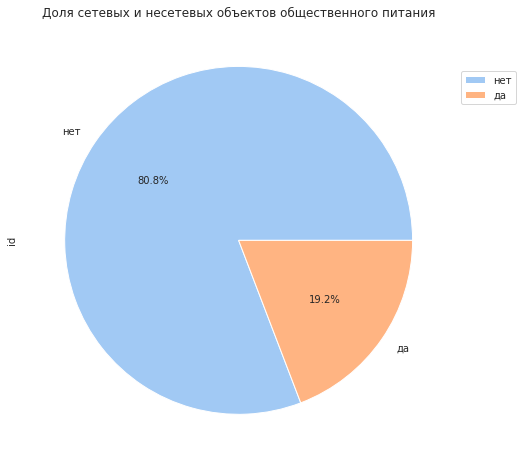

In [18]:
# круговая диаграмма 
cafe_data.groupby(by='chain').agg({'id':'count'}).sort_values(by='id', ascending=False).plot(y="id", 
                                                                                             kind="pie", 
                                                                                             figsize=(8, 8), 
                                                                                             autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, -0.1, 0, 1))
plt.title('Доля сетевых и несетевых объектов общественного питания') 
plt.show()

In [19]:
chain_list.columns = ['Сетевой объект', 'Количество']
display(chain_list)

,Сетевой объект,Количество
0,да,2916
1,нет,12281


### Вывод
Количество сетевых объектов общественного питания составляет __2916__ или __19.2%__ от всего рынка общественного питания. Таким образом количество несетвых объектов в __4 раза выше__ чем количество сетевых объектов.

<a id="num23"></a>
### 2.3. Определение для какого вида объекта общественного питания характерно сетевое распространение
Для определения наиболее распространённых видов сетевых объектов питания необходимо рассчитать какую долю занимают сетевые объекты от общего количества объектов для каждого вида.

In [20]:
# группировка по сетевой принадлежности и количество
chain_list = (
    cafe_data
    .groupby(['chain', 'object_type']).agg({'id':'count'})
    .reset_index()
    .sort_values(by='object_type')
    .query('chain == "да"')
)

# группировка по виду объекта и количество
total_cafe = (
    cafe_data
    .groupby('object_type')
    .agg({'id':'count'})
    .reset_index()
    .sort_values(by='object_type')
)

In [21]:
# процент сетевых объектов от общего количества объектов данного вида
chain_list['percent_chain'] = round(chain_list['id'] / total_cafe['id'] * 100, 1)
chain_list = chain_list.sort_values(by='percent_chain', ascending=False)

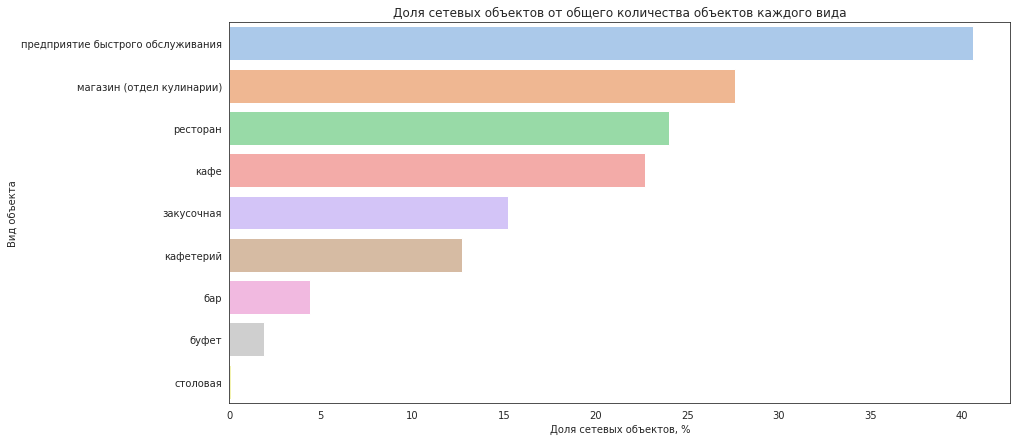

In [22]:
# гистограмма распределения сетевых объектов питания
plt.figure(figsize=(14, 7)) 
plt.title('Доля сетевых объектов от общего количества объектов каждого вида') 
sns.barplot(x='percent_chain', y='object_type', data=chain_list).set(ylabel='Вид объекта', xlabel='Доля сетевых объектов, %')
plt.show()

In [23]:
chain_list.columns = ['Сетевой объект', 'Вид объекта', 'Количество', 'Доля сетевых объектов']
display(chain_list[['Вид объекта', 'Количество', 'Доля сетевых объектов']])

,Вид объекта,Количество,Доля сетевых объектов
6,предприятие быстрого обслуживания,773,40.6
5,магазин (отдел кулинарии),74,27.6
7,ресторан,543,24.0
3,кафе,1371,22.7
2,закусочная,54,15.2
4,кафетерий,50,12.7
0,бар,37,4.4
1,буфет,11,1.9
8,столовая,3,0.1


### Вывод
* Сетевое распространение наиболее характерно для таких видов объектов общественого питания как __предприятия быстрого обслуживания__ (40%), __кулинарии__ (27%) и __рестораны__ (24%).
* Наименее распространено сетевое развитие для таких видов как __столовые, буфеты и бары__.

<a id="num24"></a>
### 2.4. Исследование особенностей сетевых заведений
Чтобы изучить особенности характерные для сетевых заведений, необходимо из общего датасета извлечь данные только о сетевых заведениях и рассчитать для них следующие показатели: среднее, медиану, максимальное и минимальное количество посадочных мест, а так же построить диаграмму распределения, чтобы визуально изучить какое количество посадочных мест наиболее распространено в сетевых заведениях. 

In [24]:
# df с сетевыми объектами питания
chain_data = cafe_data.query('chain =="да"')

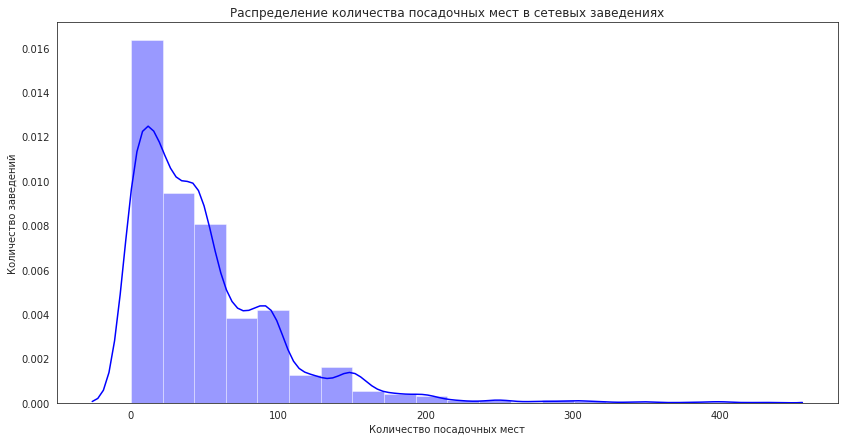

In [25]:
# график плотности распределениякол-вa посадочных мест
plt.figure(figsize=(14, 7)) 
plt.title('Распределение количества посадочных мест в сетевых заведениях') 
sns.distplot(chain_data['number'], bins=20, color='blue').set(ylabel='Количество заведений', 
                                                                xlabel='Количество посадочных мест')
plt.show()

Посчитаем количество посадочных мест в сетевых заведениях:

In [26]:
print('Медиана', int(chain_data['number'].median()), 'мест') #медиана
print('Минимум', int(chain_data['number'].min()), 'мест')    #min
print('Среднее количество', int(chain_data['number'].mean()), 'места') #среднее
print('Максимум', int(chain_data['number'].max()), 'мест')   #max

Медиана 40 мест
Минимум 0 мест
Среднее количество 49 места
Максимум 430 мест


Доля заведений с количеством посадочных мест:

In [27]:
print('  до 20 --', '{:.1%}'.format(chain_data.query('number <= 20')['number'].count() / len(chain_data['number'])))
print('  от 20 до 50 --', '{:.1%}'.format(chain_data.query('number > 20 and number <= 50')['number'].count() / len(chain_data['number'])))
print('  более 50 --', '{:.1%}'.format(chain_data.query('number > 50')['number'].count() / len(chain_data['number'])))

  до 20 -- 34.9%
  от 20 до 50 -- 31.2%
  более 50 -- 33.9%


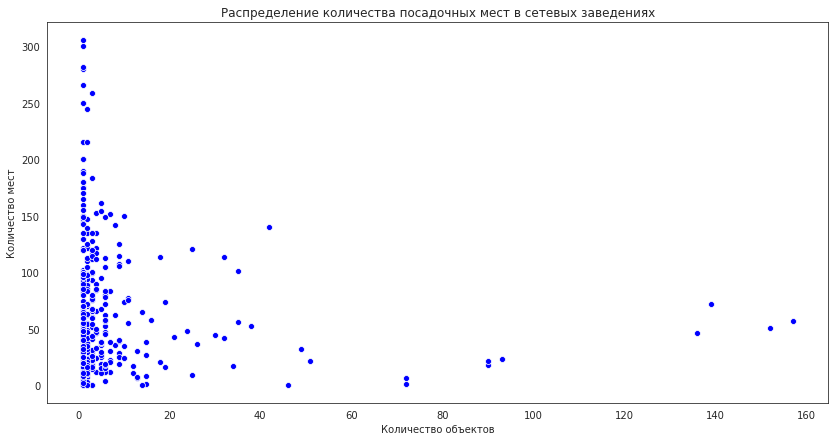

In [28]:
# группировка по названию сети и подсчёт количества объектов в сети и количества посадочных мест
chain_data_group = chain_data.groupby('object_name').agg({'object_name':'count', 'number':'mean'})
chain_data_group.columns = ['Количество объектов', 'Количество мест']
chain_data_group = chain_data_group.reset_index()
chain_data_group.columns = ['Название сети', 'Количество объектов', 'Количество мест']

# график плотности распределения посадочных мест
plt.figure(figsize=(14, 7)) 
plt.title('Распределение количества посадочных мест в сетевых заведениях') 
sns.scatterplot(x='Количество объектов', y='Количество мест', color='blue', data=chain_data_group, )
plt.show()

### Вывод
* Для более чем __65%__ всех сетевых заведений характерно наличие менее 50 посадочных мест
* Доля сетевых заведений с количеством посадочных мест от 50 до 100 составляет __24%__, а доля заведений с количеством посадочных мест свыше 100 всего __10%__. 
* Для сетевых заведений наиболее характерно: __небольшое количество заведений с небольшим количеством посадочных мест__ 

<a id="num25"></a>
### 2.5. Расчет среднего количества посадочных мест для каждого вида объекта общественного питания
Для расчёта среднего количества посадочных мест для каждого вида объекта общественного питания необходимо сгруппировать датасет по всем видам заведений и рассчитать среднее значение количества посадочных мест для каждого вида заведений. 

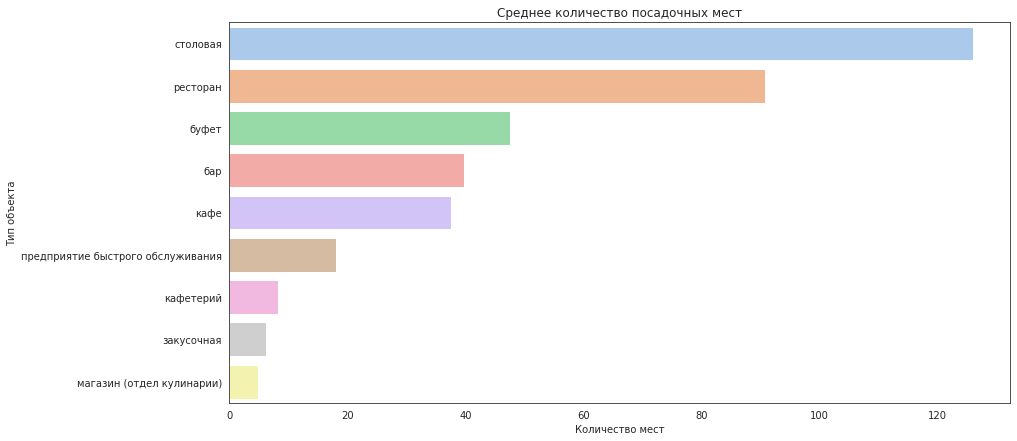

,Вид объекта,Среднее количество посадочных мест
0,столовая,126.0
1,ресторан,90.7
2,буфет,47.6
3,бар,39.7
4,кафе,37.5
5,предприятие быстрого обслуживания,18.1
6,кафетерий,8.2
7,закусочная,6.3
8,магазин (отдел кулинарии),4.8


In [29]:
# таблица со средним количеством посадочных мест для каждого вида
mean_seat_data = cafe_data.groupby('object_type').agg({'number':'mean'}).sort_values(by='number', ascending=False).reset_index()
mean_seat_data['number'] = round(mean_seat_data['number'], 1) 

# гистограмма среднего количества посадочных мест
plt.figure(figsize=(14, 7)) 
plt.title('Среднее количество посадочных мест') 
sns.barplot(x='number', y='object_type', data=mean_seat_data).set(ylabel='Тип объекта', xlabel='Количество мест')
plt.show()

#таблица
mean_seat_data.columns = ['Вид объекта', 'Среднее количество посадочных мест']
display(mean_seat_data)

### Вывод
В среднем наибольшее количество посадочных мест характерно для __столовых и ресторанов__. Меньше всего посадочных мест в __магазинах (отделах кулинарии), закусочных и кафетериях__ - в среднем менее 10 посадочных, что легко объясняется спецификой работы данных заведений.

<a id="num26"></a>
### 2.6. Определение улицы на которой расположен объект

In [30]:
# список с ключевыми словами для извлечения улицы из адреса 
streets_list = ['улица','проспект','шоссе','проезд',
                 'бульвар','переулок','набережная','площадь','вал','аллея']


def get_street(address):
    for position in [0,1,2]: 
        for address_part in address.split(',')[position].split(' '): 
            if address_part in streets_list:  
                street = address.split(', ')[position] 
                return street 
            
# новый столбец "street" с названием улицы            
cafe_data['street'] = cafe_data['address'].apply(get_street) 
cafe_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Вывод
С помощью функции __get_street__  установили название улицы на которой располагается каждый объект общественного питания.

<a id="num27"></a>
### 2.7.  Список "топ-10 улиц по количеству объектов общественного питания"
Для определения 10 улиц с наибольшим количеством объектов общественного питания необходимо сгруппировать датасет по названиям улиц и посчитать суммарное количество объектов общественного питания для каждой улицы.

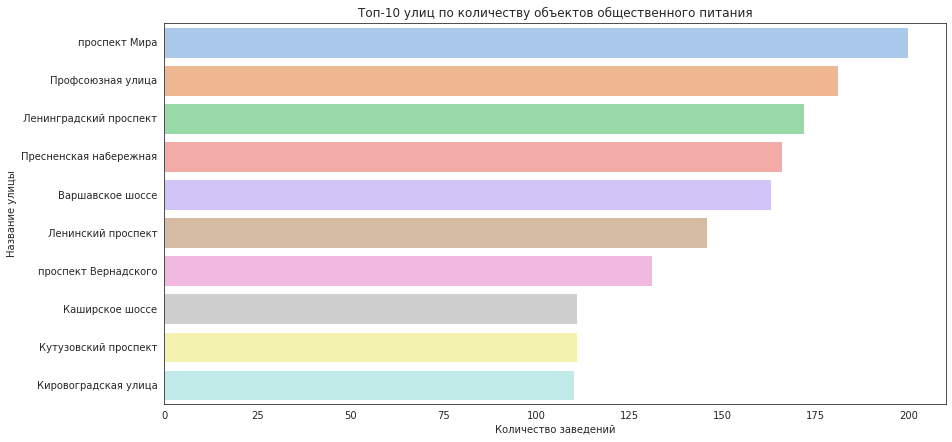

,Улица,Количество объектов
1388,проспект Мира,200
992,Профсоюзная улица,181
671,Ленинградский проспект,172
976,Пресненская набережная,166
389,Варшавское шоссе,163
674,Ленинский проспект,146
1384,проспект Вернадского,131
587,Каширское шоссе,111
662,Кутузовский проспект,111
594,Кировоградская улица,110


In [31]:
# топ-10 улиц по количеству объектов питания
top10_streets = cafe_data.groupby('street').agg({'object_name':'count'}).reset_index().sort_values(by='object_name', 
                                                                                                   ascending=False).head(10)
top10_streets.columns = ['Улица', 'Количество объектов'] # меняем названия столбцов

# график
plt.figure(figsize=(14, 7)) 
plt.title('Топ-10 улиц по количеству объектов общественного питания') 
sns.barplot(x='Количество объектов', y='Улица', data=top10_streets).set(ylabel='Название улицы', xlabel='Количество заведений')
plt.show()

display(top10_streets) 

<a id="num28"></a>
### 2.8. Определение в районов Москвы для "топ-10 улиц"

Для определения в каких районах Москвы находятся улицы с наибольшим количеством объектов общественного питания необходимо определить в каком районе расположен каждый объект. Для этого воспользуемся API сервиса **Яндекс Геокодер**. Создадим функцию **get_coordinate**, которая отправляет get-запрос к API сервиса **Яндекс Геокодер** и получает координаты объекта.

Чтобы не возникло проблем с проверкой (не пришлось ждать, пока данные не выгрузятся целиком из API) я сохранила полученный “словарь” адрес-район в отдельный csv-файл, подгрузила его в Google Sheets, а сам код получения координат закомметировала. 

In [32]:
# Функция которая принимает адрес объекта и отправляет Get-запрос на сервис Яндекс Геокодер, 
# для получения координат объекта общественного питания 
#def get_coordinate(row):
#    address = row['address']
    # URL сервиса Яндекс Геокодер + API key
#    URL = "https://geocode-maps.yandex.ru/1.x/?apikey=b499d135-d514-4a28-8e89-ee86732c5f37=" + address
    # Отправка Get-запроса в сервис Геокодер с адресом объекта 
#    response = requests.get(URL, address)
    # Получение ответа от сервиса Геокодер
#    data = BeautifulSoup(response.text, 'lxml')
#    coordinate = data.find('pos')
    # Преобразование координат к корректному виду
#    coordinate = str(coordinate).replace('<pos>', '').replace('</pos>', '').replace('[','').replace(']','').replace(' ', ', ')
#    return coordinate  # Функция возвращает координаты объекта общественного питания

Применяю созданную функцию **get_coordinate** к датафрейму **cafe_data**.

In [33]:
# Вызываю функцию 'get_cordinate' для получения координат для всех объектов питания 
#cafe_data['coordinate'] = cafe_data.apply(get_coordinate, axis=1) # Создаю новый столбец с координатами объекта

Координаты для каждого объекта общественного питания получены. Теперь создаём функцию **get_area**, которая отправляет get-запрос с координатами объекта питания к API сервиса **Яндекс Геокодер** и возвращает название района в котором расположен объект общественного питания.

In [34]:
# Функция которая принимает координаты объекта и отправляет Get-запрос на сервис Яндекс Геокодер, 
# для получения Района в котором находится объект общественного питания
#def get_area(row):
#    coordinate = row['coordinate']
    # URL сервиса Яндекс Геокодер + API key
#    URL = "https://geocode-maps.yandex.ru/1.x/?apikey=b499d135-d514-4a28-8e89-ee86732c5f37=" + coordinate
    # Отправка Get-запроса в сервис Геокодер с координатами объекта 
#    response = requests.get(URL)
    # Получение ответа от сервиса Геокодер
#    data = BeautifulSoup(response.text, 'lxml')
#    none = 'Неизвестно'
#    area = data.find_all('dependentlocalityname')
#    if len(area) > 1:
        # Преобразование названия района к корректному виду
#        area = str(area[1]).replace('<dependentlocalityname>', '').replace('</dependentlocalityname>', '')
#        return area  # Функция возвращает название района объекта общественного питания
#    else:
#        return none

Далее я применяем функцию __get_area__ к датафрейму __cafe_data__ и получаем название __района__

In [35]:
# Вызываю функцию 'get_area' для получения названия Района в котором расположен объект питания для всех записей таблицы 
#cafe_data['district'] = cafe_data.apply(get_area, axis=1) # Создаю новый столбец с названием района объекта

In [36]:
#подгружаем датасет из GoogleSheets
spreadsheet_id = '1Xa5I28nD16YA--a2p8tRKTS3J7NFzbTCepNfDXDWH60'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
cafe_data = pd.read_csv(BytesIO(r.content))
cafe_data.head()

,id,object_name,chain,object_type,address,number,street,cordinate,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,"37.714474, 55.879005",Ярославский район
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,"37.673295, 55.738307",Таганский район
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,"37.669576, 55.735571",Таганский район
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,"37.573007, 55.892713",район Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,"37.572279, 55.904074",район Лианозово


In [37]:
# список улиц с наибольшим количеством объектов общественного питания 
top10_list = []
top10_streets = top10_streets.reset_index()
for x in range(10):
    street = top10_streets.iloc[x]['Улица']
    top10_list.append(street) 

# названия районов в которых располагаются топ-10 улиц
top_district_list = [] 
def check_district(row):
    for x in top10_list:
        street = x 
        if street == row['street']: 
            district = row['district']
            top_district_list.append(district)
            
# функция для нахождения названий районов через которые проходят улицы из списка "топ-10"
cafe_data.apply(check_district, axis=1)
# удаляем дубликаты 
top_district_list = list(set(top_district_list)) 

# удаляем некорректные записи
clear_top_district_list = []
def clear_list(array):
    for x in array:
        if 'район' in x:
            clear_top_district_list.append(x)

clear_list(top_district_list)
print('Названия районов в которых находятся топ-10 улиц:')
print(clear_top_district_list)
print( 'Количество районов:', len(clear_top_district_list))

Названия районов в которых находятся топ-10 улиц:
['Хорошёвский район', 'район Ясенево', 'Ярославский район', 'район Орехово-Борисово Южное', 'район Коньково', 'район Южное Бутово', 'Обручевский район', 'Алексеевский район', 'район Москворечье-Сабурово', 'район Раменки', 'район Чертаново Центральное', 'район Аэропорт', 'район Орехово-Борисово Северное', 'район Фили-Давыдково', 'Академический район', 'район Сокол', 'Гагаринский район', 'район Проспект Вернадского', 'район Беговой', 'Останкинский район', 'район Якиманка', 'Нагорный район', 'район Тёплый Стан', 'район Дорогомилово', 'район Ростокино', 'Донской район', 'Мещанский район', 'район Чертаново Северное', 'Ломоносовский район', 'район Тропарёво-Никулино', 'Пресненский район', 'район Черёмушки', 'район Свиблово', 'район Чертаново Южное', 'район Нагатино-Садовники']
Количество районов: 35


### Вывод
* Наибольшее количество объектов питания располагается на __Проспекте Мира__, здесь __200 объектов__ общественного питания
* Каждая улица, которая входит в __топ-10__ включает в себя более 100 объектов питания
* Данные улицы проходят через __35 районов__ Москвы

<a id="num29"></a>
### 2.9. Определение улиц и районов с одним объектом общественного питания
Для выявления улиц на которых располагается только один объект общественного питания необходимо сгруппировать датасет по названию улицы и посчитать количество объектов для каждой улицы, после чего необходимо применить фильтрацию и выбрать только те улицы, на которые приходится только 1 объект общественного питания.

In [38]:
# df с улицами на которых одна точка общественного питания
streets_one_object = cafe_data.groupby('street').agg({'object_name':'count'}).reset_index().query('object_name == 1')
streets_one_object.columns = ['Улица', 'Количество объектов'] 
print(' Количество улиц с одним объектом общественного питания составляет', len(streets_one_object))

 Количество улиц с одним объектом общественного питания составляет 531


In [ ]:
# список улиц с наибольшим количеством объектов общественного питания 
one_object_list = [] 
streets_one_object = streets_one_object.reset_index()
for x in range(len(streets_one_object)):
    street = streets_one_object.iloc[x]['Улица']
    one_object_list.append(street)

# названия районов в которых располагаются улицы с 1 объектом питания
one_object_district_list = []
def check_district(row):
    for x in one_object_list:
        street = x 
        if street == row['street']: 
            district = row['district']
            one_object_district_list.append(district) 
            
#  функция для нахождения названий районов через которые проходят улицы из списка "топ-10"
cafe_data.apply(check_district, axis=1)
#почистим дубликаты
one_object_district_list = list(set(one_object_district_list)) 

#удаляем некорректные записи
clear_one_object_district_list = []
def clear_list(array):
    for x in array:
        if 'район' in x:
            clear_one_object_district_list.append(x)

clear_list(one_object_district_list)
print('Список районов с улицами, на которых расположен один объект питания:')
print(clear_one_object_district_list)
print('Количество районов:', len(clear_one_object_district_list))

### Вывод
* Количество улиц с одним объектом общественного питания составляет __531 улица__.
* Следовательно на подавляющее большинство улиц приходится более одного объекта общественного питания
* Количество районов через которые проходят улицы с одним объектом общественного питания составляет __100 районов__

<a id="num210"></a>
### 2.10. Изучение количества посадочных мест для улиц с большим количеством объектов общественного питания
Для улиц из списка __топ-10 улиц по количеству объектов питания__ необходимо построить график плотности распределения посадочных мест.

In [ ]:
# df в котором будут записи только для улиц из "топ-10"
top_10_objects_data = cafe_data.query('street in @top10_list')

# график плотности распределения кол-ва посадочных мест для наиболее популярных улиц
plt.figure(figsize=(14, 7)) 
plt.title('Распределение количества посадочных мест для топ-10 популярных улиц') 
sns.distplot(top_10_objects_data['number'], bins=20, color='blue').set(ylabel='Количество заведений', 
                                                                          xlabel='Количество посадочных мест')
plt.show()

In [ ]:
# количество посадочных мест для наиболее популярных улиц
print('Количество посадочных мест для топ-10 наиболее популярных улиц') 
print('  Медиана:', int(top_10_objects_data['number'].median()), 'мест') #медиана
print('  Минимум:', int(top_10_objects_data['number'].min()), 'мест')    #min
print('  Среднее:', int(top_10_objects_data['number'].mean()), 'места') #среднее
print('  Максимум:', int(top_10_objects_data['number'].max()), 'мест')   #max
print('Доля заведений с количеством посадочных мест:')
print('  до 20 составляет', '{:.1%}'.format(top_10_objects_data.query('number <= 20')['number']
                                            .count() / len(top_10_objects_data['number'])))
print('  от 20 до 50 составляет', '{:.1%}'.format(top_10_objects_data.query('number > 20 and number <= 50')['number']
                                                  .count() / len(top_10_objects_data['number'])))
print('  более 50 составляет', '{:.1%}'.format(top_10_objects_data.query('number > 50')['number']
                                               .count() / len(top_10_objects_data['number'])))

### Вывод
Таким образом мы имеем следующие результаты:
* В среднем количество посадочных мест составляет __52 места__, что __на 3 места__ больше чем в целом по городу
* Для большинства заведений характерно наличие от 0 до 20 посадочных мест.

<a id="num3"></a>
##  Выводы
После анализа рынка общественного питания в городе Москва были выявлены следующие особенности:
* Наибольшую долю рынка общественного питания в Москве занимают:
    * __Кафе__ - почти 40%
    * __Столовые__ - 16.8%
    * __Рестораны__ - 14.9%
    * __Предприятия быстрого обслуживания__ - 12.5%
* На остальные виды объектов общественного питания приходится в сумме 16.8%.
* Количество сетевых объектов общественного питания составляет __2916__ или __19.2%__ от всего рынка общественного питания, то есть в 4 раза ниже чем количество несетевых объектов.
* Сетевое распространение наиболее характерно для следующих видов объектов общественого питания:
    * __Предприятия быстрого обслуживания__ - 40%
    * __Магазины (отделы кулинарии)__ - 27%
    * __Рестораны__ - 24%
* Для более чем __65%__ всех сетевых заведений характерно наличие __менее 50__ посадочных мест
    * Доля сетевых заведений с количеством посадочных мест от 50 до 100 составляет __24%__
    * Доля сетевых заведений с количеством посадочных мест свыше 100 всего __10%__
    * Среднее количество посадочных мест для сетевых заведений составляет __49 мест__
* Для сетевых заведений наиболее характерно: __небольшое количество заведений с небольшим количеством посадочных мест__
* В среднем наибольшее количество посадочных мест характерно для __столовых и ресторанов__ - 126 и 90 мест соответственно
* Меньше всего посадочных мест в __отделах кулинарии, закусочных и кафетериях__ - в среднем менее 10 посадочных мест
* На долю улиц которые входят в __топ-10 улиц по количеству объектов питания__ приходится __10.1%__ от общего количества объектов питания в Москве
    * Наибольшее количество объектов питания располагается на __Проспекте Мира__ - здесь располагается __200 объектов__ общественного питания
    * На каждой улице которая входит в топ-10 располагается более 100 объектов питания
    * Данные улицы проходят через 35 районов Москвы
* Количество улиц с одним объектом общественного питания составляет __531 улица__ или __28%__ от всего рынка общественного питания Москвы
    * Количество районов через которые проходят улицы с одним объектом общественного питания составляет 100 районов

* Сравнивая количество посадочных мест для заведений расположенных на топ-10 улицах по количеству объектов питания и количество посадочных мест в целом по всем заведениям, следуют отметить следующие особенности:
    * В среднем количество посадочных мест составляет __52 места__, что на 3 места больше чем в целом по городу
    * Для большинства заведений характерно наличие от 0 до 20 посадочных мест, что выше чем в целом по городу

<a id="num4"></a>
##  Рекомендации
Таким образом можно сформулировать рекомендации относительно следующих характеристик будущего заведения:

1. __Вид заведения__:
    * Наибольшую долю рынка общественного питания в городе занимают __кафе__ - почти 40%, что в свою очередь свидетельствует о том, что данный вид заведений наиболее жизнеспособен. Следовательно, вероятность "остаться на плаву" выше, чем чем для остальных видов заведений. При открытии заведения с совершенно новой концепцией это важный параметр.  
    
2. __Количество посадочных мест__: 
    * Так как в заведениях типа  __кафе__ среднее количество посадочных мест __37__ можно предположить, что оптимальное количество посадочных мест для будущего заведения  __от 30 до 50__. 
    
3. __Район расположения__:
    * Выбор района напрямую зависит от финансовых возможностей, но если стоимость аренды не является основным критерием выбора, то я бы обращала  внимание на __Арбат__ и __Тверской район__.
    
4. __Возможность развития сети__: 
    * Основываясь на информации о том, что в заведении будет использована новая концепция - посетителей будут обслуживать роботы официанты, что в свою очередь совершенно новое и неизвестное для посетителей, а сам проект будет довольно затратным в плане инвестиций, я считаю, что возможность развития сети в краткосрочной перспективе не имеет смысла. Для начала необходимо изучить насколько успешным будет запуск и только после получения достоверных результатов можно будет задумываться об открытии новых объектов. 

Ссылка на презентацию: [Скачать](https://yadi.sk/i/yzpxTdcnbOd94w) с Яндекс Диска 